In [1]:
from plan4grid import Launcher

In [2]:
env_name = "educ_case14_storage"
scenario_id = 2
tactical_horizon = 5


Running the agent on scenario 2 for 57 steps of 25 minutes.



Steps: 100%|██████████| 57/57 [00:48<00:00,  1.17it/s]



Total reward: 872.3542394638062


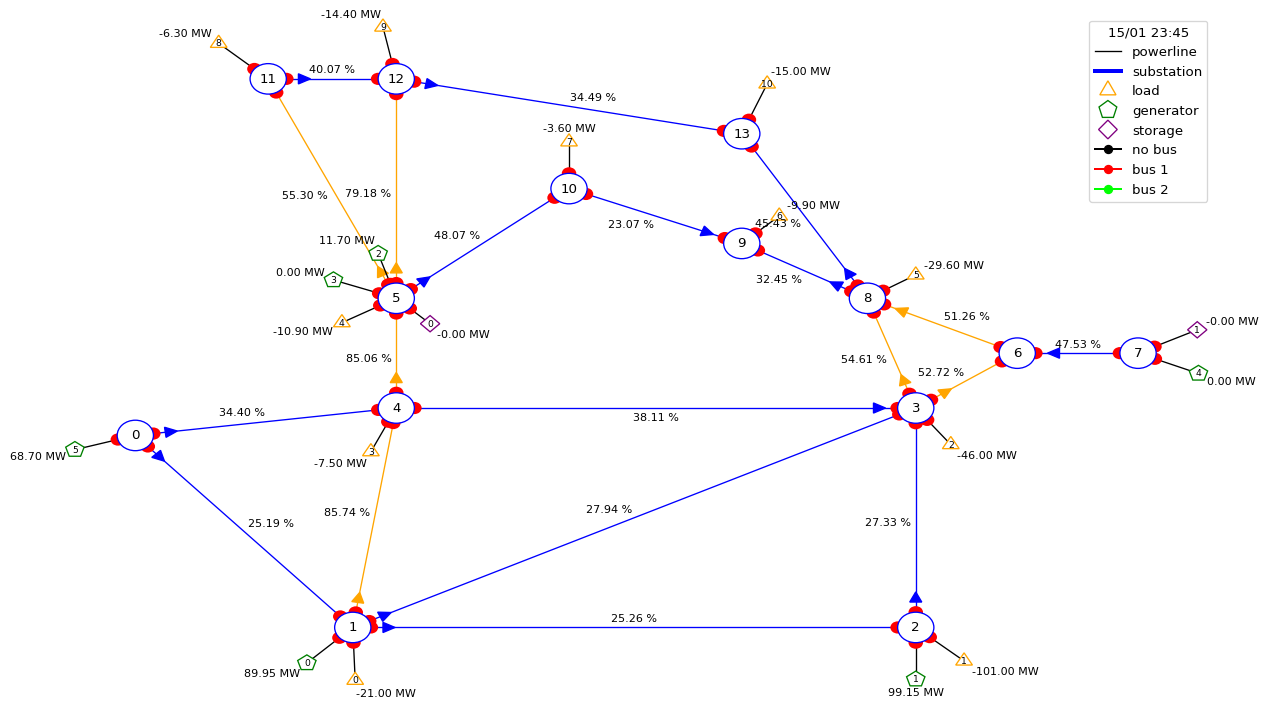

Logs are available in D:\AIPlan4Grid\.venv\Lib\site-packages\log\AIPlan4GridAgent.log
Results are available in D:\AIPlan4Grid\.venv\Lib\site-packages\results\AIPlan4GridAgent


In [3]:
launcher = Launcher(env_name, scenario_id, tactical_horizon)
launcher.launch(save=True)